# Computational Astrophysics
## Error Analysis 01

---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia

---

### About this notebook

In this notebook we present some of fundamentals about error analysis and stability.

---

Several sources of errors appear in numerical calculations. Some of them are:

**Experimental Uncertainty** : As is well known, experimental data have a limited precision. Hence, it is usual to represent this kind of data as $x \pm \Delta x$ where $\Delta x$ is the uncertainty n the measurements.\
When using experimental data in numerical algorithms, the uncertainties can lead to large errors.

**Rounding Errors (Floating Point Numbers)** : The computational representation of a number is always limited by the allocated memory. Therefore, there is an inherent round-off error in any quantity stored in the computer and it can lead to large errors if not controlled by the algorithm.

**Truncation Errors** : When we represent some functions such as suare roots, exponentials, logarithms, trigonometric funtions, derivatives, etc. using series expansions, the truncations of the series or iterations in the algorithm induce errors than can be accumulated in each step. 

Now, we will illustrate the existence of these error sources with some examples.

---
### Floating Point Number Errors (Round-off Errors)

Lets define a simple floating point such as

In [1]:
x = 3.1416
x

3.1416

Note that, when writting a 20 decimal places precision representation of this number, there is an induced error. This is inherent to the finite number of bits used to storing the floating point number.

In [2]:
print(f'{x:.20f}')

3.14159999999999994813


Hence, adding a small number to $x$ gives an unexpected result:

In [3]:
x+0.0000000000000001

3.1416

#### Machine's Epsilon

Here, we will find the minimum value $\epsilon$ for which our machine assumes that $1. + \epsilon= 1. 

$\epsilon = \min \left[ \delta >0 | 1 +\delta >1 \right]  $

This defines the machine's precision for floating point numbers calculations.

In [4]:
epsilon = 1.

while (1.+epsilon != 1.):
    epsilon = epsilon/2.

epsilon

1.1102230246251565e-16

---
Consider the floating point number $y = \cos \frac{\pi}{2}$. One expects that it must be equal to zero. However, the simple calculation gives a floating point representation of zero:

In [5]:
import numpy as np

y = np.cos(np.pi/2.) 
y

6.123233995736766e-17

Another example of the round-off error appears when we take the square root of 3,

In [6]:
z = np.sqrt(3)
z

1.7320508075688772

Note that due to the round-off error $\sqrt{3} \cdot \sqrt{3} \neq 3$

In [7]:
z*z

2.9999999999999996

---
### Absolute and Relative Errors

It is usual to define the **absolute** and **relative** errors. Denoting the *true* value of a quantity by $X$ and its approximate value by $x$, we have

$\epsilon_a = \left| X - x \right|$ : Absolute error


$\epsilon_r = \left| \frac{X - x}{X} \right|$ : Relative error


In [8]:
import numpy as np

X = np.pi
x = 3.1416

abs_error = np.abs(X - x) 
abs_error

7.346410206832132e-06

In [9]:
rel_error = np.abs((X - x)/X)
rel_error

2.3384349967961744e-06

---
### Truncation Error

Consider the $\sin x$ function and its approximate form

$\sin x = \sum_{n=1}^\infty (-1)^{n-1} \frac{x^{2n-1}}{(2n-1)!}$

The 7th-order accurate approximation is

$f(x) = x - \frac{x^3}{6} + \frac{x^5}{120}$.

This approximation of the $\sin x$ function induces a **truncation error** which can be estimated as

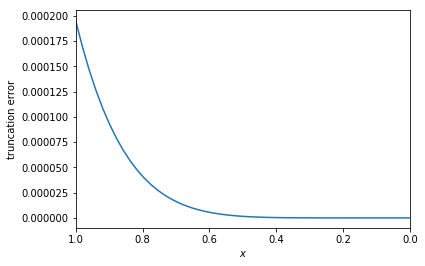

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def truncation_error(x):
    '''
    ------------------------------------------
    Returns the truncarion error obtained when
    comparing the 7th order accurate 
    approximation of the sin x function and 
    the numpy.sin() function 
    ------------------------------------------
    Arguments:
    x : point at which the truncation error is
    calculated
    ------------------------------------------
    '''
    mysin = x - x**3/6 + x**5/120
    return np.abs(np.sin(x) - mysin)

x = np.linspace(0, 1, 50)

plt.figure()
plt.plot(x, truncation_error(x))

plt.xlim(1, 0)
plt.xlabel(r'$x$')
plt.ylabel(r'truncation error')
plt.show()

#### Estimating the Accuracy of a Truncated Series
To estimate the order of accuracy of a truncated approximation, we pick a number in the range $0<x<1$ and calculate the truncation error. Then, we half the number and calculate again the truncation error. The ratio of both errors gives a factor of $2^n$, where $n$ is the order of accuracy of the approximation.

In [12]:
# Randomly choosing the number in the range 0<x<1
x = np.random.random()  
# Calculate the truncation errors and their ratio
te_x = truncation_error(x)
te_x2 = truncation_error(x/2)
ratio = te_x/te_x2 

# Results.
print(f'For x = {x:.3f} the value of the truncation error is : {te_x:.3e}' )
print(f'For x = {x/2:.3f} the value of the truncation error is : {te_x2:.3e}')
print("")
print(f'The ratio of these values is {ratio:.3f}')
print(f'which is approximately 2^{np.log2(ratio):.1f}')


For x = 0.799 the value of the truncation error is : 4.086e-05
For x = 0.399 the value of the truncation error is : 3.213e-07

The ratio of these values is 127.153
which is approximately 2^7.0


---
### Stability of an Algorithm

An algorithm, equation or problem is called **unstable** or **ill- conditioned** if small changes in the input cause a large change in the output.

In order to illustrate a stable algorithm, consider the recurrence relation

$x_0 = 1$\
$x_1 = \frac{1}{3}$\
$x_{n+1} = \frac{13}{3}x_n - \frac{4}{3} x_{n-1} $

which is equivalent to 

$x_n = \left( \frac{1}{3} \right)^n$.

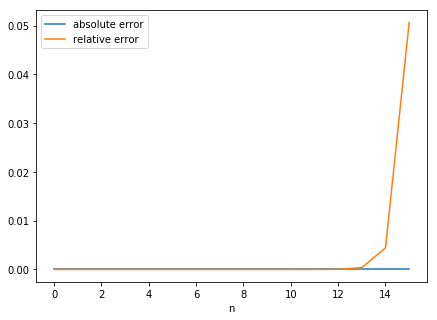

In [19]:
import numpy as np
import matplotlib.pyplot as plt

n=16
X = np.zeros(n)
x = np.zeros(n)

X[0] = 1.
X[1] = 1./3.

x[0] = 1.
x[1] = 1./3.

for i in range(2,n):
    X[i] = 13.*X[i-1]/3. - 4.*X[i-2]/3.
    x[i] = (1./3.)**(i)

abs_error = np.abs(X - x)
rel_error = np.abs((X - x)/X)

plt.figure(figsize=(7,5))

plt.plot(range(n), abs_error, label='absolute error')
plt.plot(range(n), rel_error, label='relative error')
plt.xlabel(r'n')
plt.legend()
plt.show()

Up to the step $n=15$ in the recurrence relation, the absolute error is practically zero, while the relative error to a value of $0.05 = 5\%$. Hence this algorithm shows to be **stable**.


---
Instead, the recurrence relation

$x_0 = 0$\
$x_1 = 4$\
$x_{n+1} = \frac{13}{3}x_n - \frac{4}{3} x_{n-1} $

compared to 

$x_n = 4^n$,

shows a completly different behavior.

/Users/ashcat/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


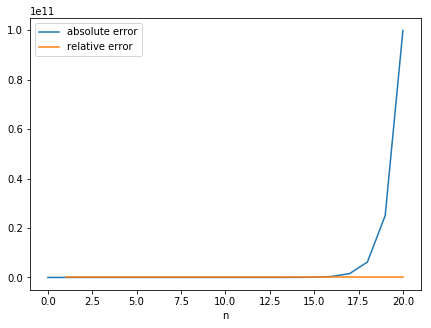

In [20]:
import numpy as np
import matplotlib.pyplot as plt

n=21
X = np.zeros(n)
x = np.zeros(n)

X[0] = 0.
X[1] = 4.

x[0] = 1.
x[1] = 4.

for i in range(2,n):
    X[i] = 13.*X[i-1]/3. - 4.*X[i-2]/3.
    x[i] = (4.)**(i)

abs_error = np.abs(X - x)
rel_error = np.abs((X - x)/X)

plt.figure(figsize=(7,5))

plt.plot(range(n), abs_error, label='absolute error')
plt.plot(range(n), rel_error, label='relative error')
plt.xlabel(r'n')
plt.legend()
plt.show()

Here, up to the step $n=20$ the relative error is very small but the absolute error grows incredible high (up to $1 \times 10^{11}$) !. This algorithm is **unstable**.